<a href="https://colab.research.google.com/github/iamBehzad/CIFAR10-Deep-Neural-Network-Tensorflow-keras/blob/main/CIFAR10_Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#instal keras-tuner

In [ ]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 KB 4.8 MB/s eta 0:00:00


# Import libraries

In [ ]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras import metrics
import keras_tuner
import time
import pandas as pd


# train_test_split

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x=np.concatenate((x_train, x_test), axis=0)
y=np.concatenate((y_train, y_test), axis=0)

print("x.shape = ",x.shape)
print("y.shape = ",y.shape)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15 )

print("X_train.shape = ",x_train.shape)
print("y_train.shape = ",y_train.shape)
print("X_test.shape = ",x_test.shape)
print("y_test.shape = ",y_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
x.shape =  (60000, 32, 32, 3)
y.shape =  (60000, 1)
X_train.shape =  (51000, 32, 32, 3)
y_train.shape =  (51000, 1)
X_test.shape =  (9000, 32, 32, 3)
y_test.shape =  (9000, 1)


# Normalization

In [ ]:
x_train, x_test = x_train/255.0 , x_test/255.0

#define build_model function for use in keras tuner

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=[32, 32, 3]))
    model.add(
        layers.Dense(
            # Tune number of units.
            units=hp.Int("units1", min_value=32, max_value=512, step=32),
            # Tune the activation function to use.
            activation=hp.Choice("activation1", ["relu", "tanh"]),
        )
    )
    model.add(
        layers.Dense(
            # Tune number of units.
            units=hp.Int("units2", min_value=32, max_value=512, step=32),
            # Tune the activation function to use.
            activation=hp.Choice("activation2", ["relu", "tanh"]),
        )
    )
    model.add(
        layers.Dense(
            # Tune number of units.
            units=hp.Int("units3", min_value=32, max_value=512, step=32),
            # Tune the activation function to use.
            activation=hp.Choice("activation3", ["relu", "tanh"]),
        )
    )
    model.add(
        layers.Dense(
            # Tune number of units.
            units=hp.Int("units4", min_value=32, max_value=512, step=32),
            # Tune the activation function to use.
            activation=hp.Choice("activation4", ["relu", "tanh"]),
        )
    )
    model.add(layers.Dense(10, activation="softmax"))

    # Define the optimizer learning rate as a hyperparameter.
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

build_model(keras_tuner.HyperParameters())

#Keras Tuner 

In [ ]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=5,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search_space_summary()

Search space summary
Default search space size: 9
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation2 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation3 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation4 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_valu

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.15 )

tuner.search(x_train, y_train, epochs=2, validation_data=(x_val, y_val))

Trial 3 Complete [00h 05m 05s]
val_accuracy: 0.17853595018386842

Best val_accuracy So Far: 0.17853595018386842
Total elapsed time: 00h 14m 26s


In [ ]:
tuner.results_summary()
# Get the top 2 hyperparameters.
best_hps = tuner.get_best_hyperparameters(2)
print(best_hps[0].values)
# Build the model with the best hp.
best_model = build_model(best_hps[0])
best_model.summary()


Results summary
Results in my_dir/helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
units1: 320
activation1: tanh
units2: 256
activation2: tanh
units3: 64
activation3: relu
units4: 128
activation4: tanh
lr: 0.0015330327320497972
Score: 0.17853595018386842

Trial 1 summary
Hyperparameters:
units1: 32
activation1: relu
units2: 480
activation2: relu
units3: 352
activation3: tanh
units4: 192
activation4: relu
lr: 0.0017314000248943061
Score: 0.15320261865854262

Trial 0 summary
Hyperparameters:
units1: 384
activation1: tanh
units2: 224
activation2: relu
units3: 320
activation3: relu
units4: 256
activation4: tanh
lr: 0.0054596401704574485
Score: 0.10237908512353897
{'units1': 320, 'activation1': 'tanh', 'units2': 256, 'activation2': 'tanh', 'units3': 64, 'activation3': 'relu', 'units4': 128, 'activation4': 'tanh', 'lr': 0.0015330327320497972}
Model: "sequential_1"
______________________________________________________________

#Fit and Plot the best model found so far

Epoch 1/50
1435/1435 [==============================] - 22s 15ms/step - loss: 2.1479 - accuracy: 0.1631 - val_loss: 2.0646 - val_accuracy: 0.1851
Epoch 2/50
1435/1435 [==============================] - 21s 15ms/step - loss: 2.1132 - accuracy: 0.1710 - val_loss: 2.0915 - val_accuracy: 0.1827
Epoch 3/50
1435/1435 [==============================] - 20s 14ms/step - loss: 2.1052 - accuracy: 0.1715 - val_loss: 2.0752 - val_accuracy: 0.1937
Epoch 4/50
1435/1435 [==============================] - 21s 15ms/step - loss: 2.0963 - accuracy: 0.1754 - val_loss: 2.1384 - val_accuracy: 0.1678
Epoch 5/50
1435/1435 [==============================] - 20s 14ms/step - loss: 2.0887 - accuracy: 0.1788 - val_loss: 2.0736 - val_accuracy: 0.1880
Epoch 6/50
1435/1435 [==============================] - 21s 15ms/step - loss: 2.0956 - accuracy: 0.1758 - val_loss: 2.1064 - val_accuracy: 0.1757
Epoch 7/50
1435/1435 [==============================] - 22s 16ms/step - loss: 2.0897 - accuracy: 0.1775 - val_loss: 2.0984 -

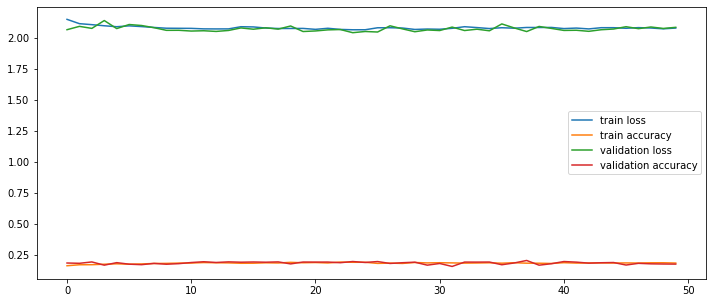

In [ ]:
# Fit with the entire dataset.
x_all = np.concatenate((x_train, x_val))
y_all = np.concatenate((y_train, y_val))

best_model_history = best_model.fit(x=x_all, y=y_all,  batch_size=32 , epochs=50, validation_split=0.1)

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(best_model_history.history['loss'], label='train loss')
ax.plot(best_model_history.history['accuracy'], label='train accuracy')
ax.plot(best_model_history.history['val_loss'], label='validation loss')
ax.plot(best_model_history.history['val_accuracy'], label='validation accuracy')
ax.legend()

In [ ]:
print(best_hps[0].values)
print(best_model.evaluate(x_test, y_test, verbose=1, return_dict=True))


{'units1': 320, 'activation1': 'tanh', 'units2': 256, 'activation2': 'tanh', 'units3': 64, 'activation3': 'relu', 'units4': 128, 'activation4': 'tanh', 'lr': 0.0015330327320497972}
282/282 [==============================] - 1s 4ms/step - loss: 2.0708 - accuracy: 0.1846
{'loss': 2.0708205699920654, 'accuracy': 0.1845555603504181}


# change model properties to be self normalize (Selu and Lecun)

In [ ]:
best_model_withSelu = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[32, 32, 3]),
  keras.layers.Dense(160, activation ="selu", kernel_initializer='lecun_normal'),
  keras.layers.Dense(352, activation='selu', kernel_initializer='lecun_normal'),
  keras.layers.Dense(512, activation='selu', kernel_initializer='lecun_normal'),
  keras.layers.Dense(384, activation='selu', kernel_initializer='lecun_normal'),
  keras.layers.Dense(10, activation="softmax")
])

print(best_model_withSelu.summary())
lr = 0.00032699677404287816
best_model_withSelu.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_10 (Dense)            (None, 160)               491680    
                                                                 
 dense_11 (Dense)            (None, 352)               56672     
                                                                 
 dense_12 (Dense)            (None, 512)               180736    
                                                                 
 dense_13 (Dense)            (None, 384)               196992    
                                                                 
 dense_14 (Dense)            (None, 10)                3850      
                                                                 
Total params: 929,930
Trainable params: 929,930
Non-tr

In [ ]:
best_model_withSelu_history = best_model_withSelu.fit(x_all, y_all, batch_size=32 , epochs=50, validation_split=0.1)
print(best_model_withSelu_history.history)

Epoch 1/50
1435/1435 [==============================] - 26s 18ms/step - loss: 1.9266 - accuracy: 0.3157 - val_loss: 1.7735 - val_accuracy: 0.3678
Epoch 2/50
1435/1435 [==============================] - 22s 15ms/step - loss: 1.6870 - accuracy: 0.3973 - val_loss: 1.7349 - val_accuracy: 0.3680
Epoch 3/50
1435/1435 [==============================] - 20s 14ms/step - loss: 1.5906 - accuracy: 0.4348 - val_loss: 1.5762 - val_accuracy: 0.4306
Epoch 4/50
1435/1435 [==============================] - 21s 15ms/step - loss: 1.5216 - accuracy: 0.4570 - val_loss: 1.6003 - val_accuracy: 0.4337
Epoch 5/50
1435/1435 [==============================] - 26s 18ms/step - loss: 1.4657 - accuracy: 0.4738 - val_loss: 1.4914 - val_accuracy: 0.4741
Epoch 6/50
1435/1435 [==============================] - 24s 16ms/step - loss: 1.4218 - accuracy: 0.4918 - val_loss: 1.4676 - val_accuracy: 0.4727
Epoch 7/50
1435/1435 [==============================] - 20s 14ms/step - loss: 1.3643 - accuracy: 0.5118 - val_loss: 1.4445 -

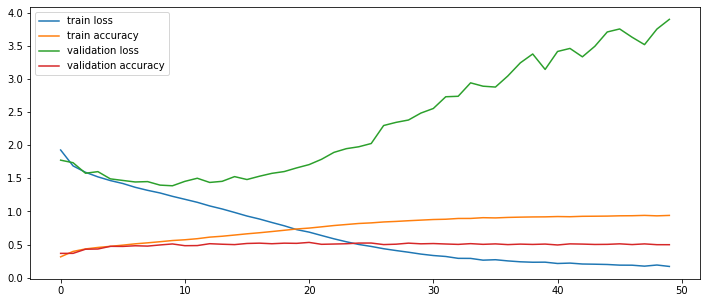

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(best_model_withSelu_history.history['loss'], label='train loss')
ax.plot(best_model_withSelu_history.history['accuracy'], label='train accuracy')
ax.plot(best_model_withSelu_history.history['val_loss'], label='validation loss')
ax.plot(best_model_withSelu_history.history['val_accuracy'], label='validation accuracy')
ax.legend()

In [ ]:
# evaluate the model
best_model_withSelu.evaluate(x_test, y_test, verbose=0, return_dict=True)

{'loss': 3.898838996887207, 'accuracy': 0.5064444541931152}

In [ ]:
best_model_withBatchNormalization = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[32, 32, 3]),
  keras.layers.Dense(160, activation ="relu"),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(352, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(384, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(10, activation="softmax")
])

print(best_model_withBatchNormalization.summary())
lr = 0.00032699677404287816
best_model_withBatchNormalization.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 160)               491680    
                                                                 
 batch_normalization (BatchN  (None, 160)              640       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 352)               56672     
                                                                 
 batch_normalization_1 (Batc  (None, 352)              1408      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 512)               1

In [ ]:
start_time = time.time()
best_model_withBatchNormalization_history = best_model_withBatchNormalization.fit(x_train, y_train, batch_size=32 , epochs=50, validation_split=0.1)
#print(best_model_withBatchNormalization_history.history)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
1435/1435 [==============================] - 19s 7ms/step - loss: 1.7832 - accuracy: 0.3734 - val_loss: 1.8144 - val_accuracy: 0.3553
Epoch 2/50
1435/1435 [==============================] - 10s 7ms/step - loss: 1.5624 - accuracy: 0.4436 - val_loss: 2.1729 - val_accuracy: 0.3331
Epoch 3/50
1435/1435 [==============================] - 11s 8ms/step - loss: 1.4883 - accuracy: 0.4725 - val_loss: 1.6197 - val_accuracy: 0.4275
Epoch 4/50
1435/1435 [==============================] - 11s 8ms/step - loss: 1.4101 - accuracy: 0.4964 - val_loss: 1.4490 - val_accuracy: 0.4822
Epoch 5/50
1435/1435 [==============================] - 10s 7ms/step - loss: 1.3431 - accuracy: 0.5217 - val_loss: 1.5297 - val_accuracy: 0.4582
Epoch 6/50
1435/1435 [==============================] - 11s 7ms/step - loss: 1.2946 - accuracy: 0.5382 - val_loss: 1.5145 - val_accuracy: 0.4782
Epoch 7/50
1435/1435 [==============================] - 10s 7ms/step - loss: 1.2462 - accuracy: 0.5580 - val_loss: 1.4139 - val_ac

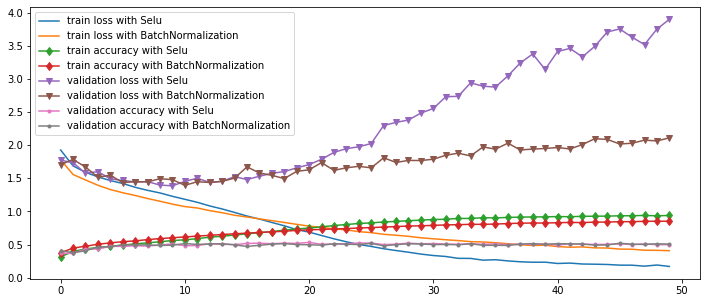

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(best_model_withSelu_history.history['loss'], label='train loss with Selu')
ax.plot(best_model_withBatchNormalization_history.history['loss'], label='train loss with BatchNormalization')
ax.plot(best_model_withSelu_history.history['accuracy'], label='train accuracy with Selu', marker='d')
ax.plot(best_model_withBatchNormalization_history.history['accuracy'], label='train accuracy with BatchNormalization', marker='d')
ax.plot(best_model_withSelu_history.history['val_loss'], label='validation loss with Selu', marker='v')
ax.plot(best_model_withBatchNormalization_history.history['val_loss'], label='validation loss with BatchNormalization', marker='v')
ax.plot(best_model_withSelu_history.history['val_accuracy'], label='validation accuracy with Selu', marker='.')
ax.plot(best_model_withBatchNormalization_history.history['val_accuracy'], label='validation accuracy with BatchNormalization', marker='.')
ax.legend()

In [ ]:
# evaluate the model
best_model_withBatchNormalization.evaluate(x_test, y_test, verbose=0, return_dict=True)

{'loss': 2.0464863777160645, 'accuracy': 0.5130000114440918}

# Save and Load model

In [ ]:
best_model_withBatchNormalization.save("best_model_withBatchNormalization0.h5")
best_model_withBatchNormalization1=keras.models.load_model("best_model_withBatchNormalization0.h5")

#Clone Model

In [ ]:
HorseDetectionModel_cloned=keras.models.clone_model(best_model_withBatchNormalization1)
HorseDetectionModel_cloned.set_weights(best_model_withBatchNormalization1.get_weights())

#Remove the last layer and Add new layer to model for horse Prediction

In [ ]:
HorseDetectionModel1=keras.models.Sequential(HorseDetectionModel_cloned.layers[:-1])
HorseDetectionModel1.add(keras.layers.Dense(1, activation='sigmoid'))
print(HorseDetectionModel1.get_weights())

[array([[ 0.04790339,  0.03075957,  0.0209818 , ...,  0.07931375,
        -0.02945589, -0.02381535],
       [ 0.02759997,  0.0348742 , -0.00625026, ...,  0.05007003,
        -0.03506317, -0.02988289],
       [-0.02511917, -0.02717142,  0.00264144, ..., -0.01213329,
        -0.01198573, -0.01098627],
       ...,
       [-0.02552472,  0.0169223 ,  0.04094742, ..., -0.00529042,
         0.01633359,  0.01730836],
       [-0.00382545,  0.00220298,  0.02511898, ...,  0.07990531,
        -0.01804926,  0.03574277],
       [ 0.01648655,  0.02320322,  0.0048793 , ...,  0.3053609 ,
        -0.03477193,  0.0086945 ]], dtype=float32), array([ 2.1990668e-03, -1.9637477e-03, -4.1596647e-04, -2.6760078e-03,
        3.4516993e-01, -2.3839506e-03, -6.1579240e-03, -1.5924063e-03,
        3.9554867e-01, -7.9995450e-03, -1.7097394e-03, -2.4766212e-03,
        4.3225181e-03, -1.7223706e-03,  1.9437794e-02,  3.4419027e-01,
        2.6183948e-01,  5.3484732e-01,  6.0166162e-01, -2.0668602e-03,
       -1.96373

#Preparation Data for train model and Horse prediction 

In [ ]:
x_Horse= x[:6000,:,:]
y_Horse=np.where(y == 7 , 1, 0)[:6000]

print("Number of Horse label = " ,np.sum(y_Horse))

print('x_Horse.shape = ',x_Horse.shape)
print('y_Horse.shape = ',y_Horse.shape)

x_train_Horse, x_test_Horse, y_train_Horse, y_test_Horse = train_test_split(x_Horse,y_Horse,test_size=0.15 )

print("x_train_Horse.shape = ",x_train_Horse.shape)
print("y_train_Horse.shape = ",y_train_Horse.shape)
print("x_test_Horse.shape = ",x_test_Horse.shape)
print("y_test_Horse.shape = ",y_test_Horse.shape)

Number of Horse label =  597
x_Horse.shape =  (6000, 32, 32, 3)
y_Horse.shape =  (6000, 1)
x_train_Horse.shape =  (5100, 32, 32, 3)
y_train_Horse.shape =  (5100, 1)
x_test_Horse.shape =  (900, 32, 32, 3)
y_test_Horse.shape =  (900, 1)


#Freeze Layers

In [ ]:
for layer in HorseDetectionModel1.layers[:-1]:
  layer.trainable=False
  print(layer.trainable)

False
False
False
False
False
False
False
False
False


In [ ]:

HorseDetectionModel1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_15 (Dense)            (None, 160)               491680    
                                                                 
 batch_normalization (BatchN  (None, 160)              640       
 ormalization)                                                   
                                                                 
 dense_16 (Dense)            (None, 352)               56672     
                                                                 
 batch_normalization_1 (Batc  (None, 352)              1408      
 hNormalization)                                                 
                                                                 
 dense_17 (Dense)            (None, 512)              

#Compile,Fit and evaluate model with freeze layers

In [ ]:
lr = 0.00032699677404287816
HorseDetectionModel1.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )

start_time = time.time()

HorseDetectionModel1_history = HorseDetectionModel1.fit(x_train_Horse, y_train_Horse, batch_size=32 , epochs=50, validation_split=0.1)
print(HorseDetectionModel1_history.history)

print("--- %s seconds ---" % (time.time() - start_time))
# evaluate the model
print(HorseDetectionModel1.evaluate(x_test_Horse, y_test_Horse, verbose=0, return_dict=True))

Epoch 1/50
144/144 [==============================] - 2s 6ms/step - loss: 46.6815 - accuracy: 0.8370 - val_loss: 33.1564 - val_accuracy: 0.8510
Epoch 2/50
144/144 [==============================] - 1s 5ms/step - loss: 32.9102 - accuracy: 0.8481 - val_loss: 24.9699 - val_accuracy: 0.8824
Epoch 3/50
144/144 [==============================] - 1s 5ms/step - loss: 25.9216 - accuracy: 0.8627 - val_loss: 21.0256 - val_accuracy: 0.8922
Epoch 4/50
144/144 [==============================] - 1s 4ms/step - loss: 22.3289 - accuracy: 0.8686 - val_loss: 18.9781 - val_accuracy: 0.8941
Epoch 5/50
144/144 [==============================] - 1s 5ms/step - loss: 19.6929 - accuracy: 0.8747 - val_loss: 17.2948 - val_accuracy: 0.9118
Epoch 6/50
144/144 [==============================] - 1s 5ms/step - loss: 18.0498 - accuracy: 0.8839 - val_loss: 19.4398 - val_accuracy: 0.8471
Epoch 7/50
144/144 [==============================] - 1s 7ms/step - loss: 16.9344 - accuracy: 0.8817 - val_loss: 16.2899 - val_accuracy:

#Unfreeze Layers

In [ ]:
for layer in HorseDetectionModel1.layers[:-1]:
  layer.trainable=True
  print(layer.trainable)

True
True
True
True
True
True
True
True
True


#Compile,Fit and evaluate model with **unfreeze** layers

In [ ]:
lr = 0.00032699677404287816
HorseDetectionModel1.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )

start_time = time.time()

HorseDetectionModel1_history = HorseDetectionModel1.fit(x_train_Horse, y_train_Horse, batch_size=32 , epochs=50, validation_split=0.1)
print(HorseDetectionModel1_history.history)

print("--- %s seconds ---" % (time.time() - start_time))
# evaluate the model
print(HorseDetectionModel1.evaluate(x_test_Horse, y_test_Horse, verbose=0, return_dict=True))

Epoch 1/50
144/144 [==============================] - 6s 17ms/step - loss: 0.4780 - accuracy: 0.7810 - val_loss: 0.2658 - val_accuracy: 0.9078
Epoch 2/50
144/144 [==============================] - 2s 15ms/step - loss: 0.2283 - accuracy: 0.9394 - val_loss: 0.1882 - val_accuracy: 0.9451
Epoch 3/50
144/144 [==============================] - 3s 18ms/step - loss: 0.1338 - accuracy: 0.9662 - val_loss: 0.1836 - val_accuracy: 0.9353
Epoch 4/50
144/144 [==============================] - 3s 19ms/step - loss: 0.0950 - accuracy: 0.9773 - val_loss: 0.1367 - val_accuracy: 0.9529
Epoch 5/50
144/144 [==============================] - 2s 15ms/step - loss: 0.0660 - accuracy: 0.9856 - val_loss: 0.1220 - val_accuracy: 0.9608
Epoch 6/50
144/144 [==============================] - 2s 15ms/step - loss: 0.0512 - accuracy: 0.9880 - val_loss: 0.1462 - val_accuracy: 0.9451
Epoch 7/50
144/144 [==============================] - 2s 17ms/step - loss: 0.0375 - accuracy: 0.9932 - val_loss: 0.1473 - val_accuracy: 0.9549

#Define a model for test various optimizers : SGD، SGD with momentum، Nesterov SGD with momentum، AdaGrad، Adam , Nadam 

In [ ]:
model_Optimizer_Testing = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[32, 32, 3]),
  keras.layers.Dense(160, activation ="relu"),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(352, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(384, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(10, activation="softmax")
])


print(model_Optimizer_Testing.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_10 (Dense)            (None, 160)               491680    
                                                                 
 batch_normalization_8 (Batc  (None, 160)              640       
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 352)               56672     
                                                                 
 batch_normalization_9 (Batc  (None, 352)              1408      
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 512)              

In [ ]:
lr = 0.0001
loss=[]
accuracy=[]

# Define the optimizers
sgd = keras.optimizers.SGD(lr)
momentum = keras.optimizers.SGD(lr, momentum=0.9)
nesterov = keras.optimizers.SGD(lr, momentum=0.9, nesterov=True)
adagrad = keras.optimizers.Adagrad(lr)
adam = keras.optimizers.Adam(lr)
nadam = keras.optimizers.Nadam(lr)

optimizers = [sgd, momentum, nesterov, adagrad, adam, nadam]
names = ['sgd','SGD with momentum','Nesterov SGD with momentum','AdaGrad','Adam','Nadam'] 
loss = []
accuracy = []
    
# Train the model with each optimizer and plot the results

for i, optimizer in enumerate(optimizers):
    model_Optimizer_Testing.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    start_time = time.time()

    model_Optimizer_Testing_history = model_Optimizer_Testing.fit(x_train, y_train, batch_size=32, epochs=50, verbose=0, validation_split=0.1)
    lss,acc = model_Optimizer_Testing.evaluate(x_test, y_test, verbose=0)

    print(names[i] ," finished --- %s seconds ---" % (time.time() - start_time))

    loss.append(lss)
    accuracy.append(acc)

sgd  finished --- 856.428295135498 seconds ---
SGD with momentum  finished --- 916.1402587890625 seconds ---
Nesterov SGD with momentum  finished --- 1046.6934151649475 seconds ---
AdaGrad  finished --- 986.2908036708832 seconds ---
Adam  finished --- 1228.265334367752 seconds ---
Nadam  finished --- 1445.0021886825562 seconds ---


#Result of evaluating models with various optimizers

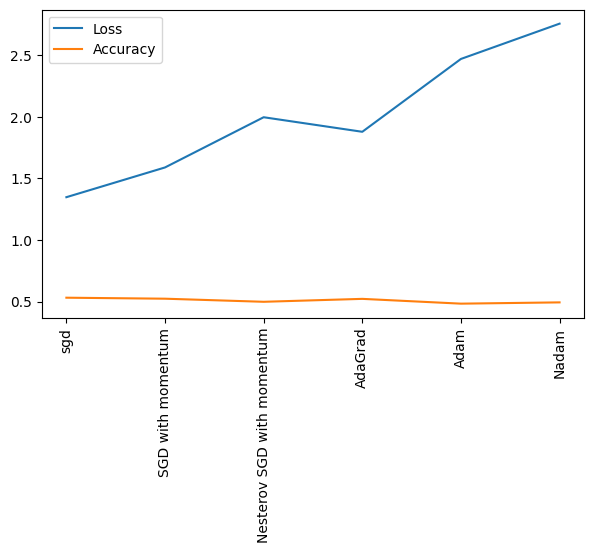

Optimizer  ['sgd', 'SGD with momentum', 'Nesterov SGD with momentum', 'AdaGrad', 'Adam', 'Nadam']
Loss  [1.3471697568893433, 1.5886809825897217, 1.9963346719741821, 1.878178596496582, 2.469599962234497, 2.756182909011841]
Accuracy [0.5311111211776733, 0.5230000019073486, 0.4978888928890228, 0.5216666460037231, 0.48277777433395386, 0.49311110377311707]
Time ['856.428295135498', '916.1402587890625', '1046.6934151649475 ', '986.2908036708832 ', '1228.265334367752', '1445.0021886825562']


In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(names,loss,label='Loss')
plt.plot(names,accuracy, label="Accuracy")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

print("Optimizer ", names)
print('Loss ',loss)
print('Accuracy', accuracy)
print('Time',time)


# Create a model with L2=0.01 in first hidden layer and a DropoutLayer(Drop=0.2) after last Hidden layer

In [ ]:
model_Regularize_Testing = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[32, 32, 3]),
  keras.layers.Dense(160, activation ="relu", kernel_initializer = 'he_normal', 
                    kernel_regularizer=keras.regularizers.l2(0.01)),
  keras.layers.Dense(352, activation='relu', kernel_initializer = 'he_normal'),
  keras.layers.Dense(512, activation='relu', kernel_initializer = 'he_normal'),
  keras.layers.Dense(384, activation='relu', kernel_initializer = 'he_normal'),
  keras.layers.Dropout(0.2),  
  keras.layers.Dense(10, activation="softmax")
])
print(model_Regularize_Testing.summary())

lr = 0.00032699677404287816
model_Regularize_Testing.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 3072)              0         
                                                                 
 dense_26 (Dense)            (None, 160)               491680    
                                                                 
 dense_27 (Dense)            (None, 352)               56672     
                                                                 
 dense_28 (Dense)            (None, 512)               180736    
                                                                 
 dense_29 (Dense)            (None, 384)               196992    
                                                                 
 dropout_3 (Dropout)         (None, 384)               0         
                                                                 
 dense_30 (Dense)            (None, 10)               

In [ ]:
model_Regularize_Testing_history = model_Regularize_Testing.fit(x_train, y_train, batch_size=32 , epochs=100, validation_split=0.1)
print(model_Regularize_Testing_history.history)

Epoch 1/100
1435/1435 [==============================] - 28s 19ms/step - loss: 2.4792 - accuracy: 0.3139 - val_loss: 1.9145 - val_accuracy: 0.3557
Epoch 2/100
1435/1435 [==============================] - 27s 19ms/step - loss: 1.8440 - accuracy: 0.3770 - val_loss: 1.7149 - val_accuracy: 0.4151
Epoch 3/100
1435/1435 [==============================] - 26s 18ms/step - loss: 1.7335 - accuracy: 0.4076 - val_loss: 1.7041 - val_accuracy: 0.4110
Epoch 4/100
1435/1435 [==============================] - 25s 18ms/step - loss: 1.6737 - accuracy: 0.4255 - val_loss: 1.6679 - val_accuracy: 0.4320
Epoch 5/100
1435/1435 [==============================] - 24s 17ms/step - loss: 1.6318 - accuracy: 0.4393 - val_loss: 1.5902 - val_accuracy: 0.4625
Epoch 6/100
1435/1435 [==============================] - 26s 18ms/step - loss: 1.6112 - accuracy: 0.4505 - val_loss: 1.6076 - val_accuracy: 0.4443
Epoch 7/100
1435/1435 [==============================] - 25s 17ms/step - loss: 1.5889 - accuracy: 0.4572 - val_loss: 1

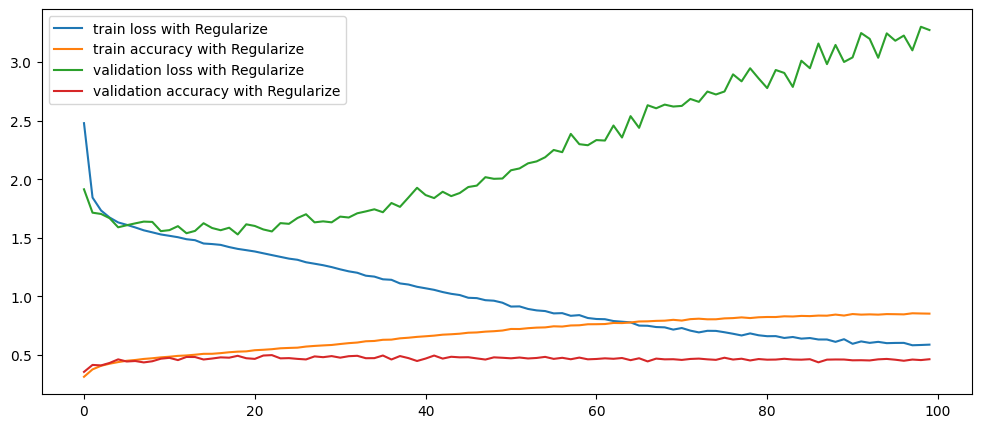

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(model_Regularize_Testing_history.history['loss'], label='train loss with Regularize')
ax.plot(model_Regularize_Testing_history.history['accuracy'], label='train accuracy with Regularize')
ax.plot(model_Regularize_Testing_history.history['val_loss'], label='validation loss with Regularize')
ax.plot(model_Regularize_Testing_history.history['val_accuracy'], label='validation accuracy with Regularize')
ax.legend()

In [ ]:
# evaluate the model
print(model_Regularize_Testing.evaluate(x_test, y_test, verbose=0, return_dict=True))

{'loss': 3.2202417850494385, 'accuracy': 0.46577778458595276}


In [ ]:
class MonteCarloDropout(keras.layers.Dropout):
  def call(self, inputs):
    return super().call(inputs, training=True)
mc_dropout =  MonteCarloDropout(0.2)

In [ ]:
model_Regularize_Testing2 = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[32, 32, 3]),
  keras.layers.Dense(160, activation ="relu", kernel_initializer = 'he_normal', 
                    kernel_regularizer=keras.regularizers.l2(0.01)),
  keras.layers.Dense(352, activation='relu', kernel_initializer = 'he_normal'),
  keras.layers.Dense(512, activation='relu', kernel_initializer = 'he_normal'),
  keras.layers.Dense(384, activation='relu', kernel_initializer = 'he_normal'),
  mc_dropout,  
  keras.layers.Dense(10, activation="softmax")
])
print(model_Regularize_Testing.summary())

lr = 0.00032699677404287816
model_Regularize_Testing2.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 3072)              0         
                                                                 
 dense_31 (Dense)            (None, 160)               491680    
                                                                 
 dense_32 (Dense)            (None, 352)               56672     
                                                                 
 dense_33 (Dense)            (None, 512)               180736    
                                                                 
 dense_34 (Dense)            (None, 384)               196992    
                                                                 
 monte_carlo_dropout (MonteC  multiple                 0         
 arloDropout)                                                    
                                                      

In [ ]:
model_Regularize_Testing2_history = model_Regularize_Testing2.fit(x_train, y_train, batch_size=32 , epochs=100, validation_split=0.1)
print(model_Regularize_Testing2_history.history)

Epoch 1/100
1435/1435 [==============================] - 29s 20ms/step - loss: 1.9221 - accuracy: 0.3638 - val_loss: 1.7881 - val_accuracy: 0.3910
Epoch 2/100
1435/1435 [==============================] - 36s 25ms/step - loss: 1.7671 - accuracy: 0.3993 - val_loss: 1.7092 - val_accuracy: 0.4080
Epoch 3/100
1435/1435 [==============================] - 30s 21ms/step - loss: 1.6912 - accuracy: 0.4256 - val_loss: 1.6670 - val_accuracy: 0.4273
Epoch 4/100
1435/1435 [==============================] - 31s 21ms/step - loss: 1.6489 - accuracy: 0.4366 - val_loss: 1.8033 - val_accuracy: 0.3820
Epoch 5/100
1435/1435 [==============================] - 26s 18ms/step - loss: 1.6269 - accuracy: 0.4449 - val_loss: 1.6465 - val_accuracy: 0.4394
Epoch 6/100
1435/1435 [==============================] - 26s 18ms/step - loss: 1.5953 - accuracy: 0.4570 - val_loss: 1.5934 - val_accuracy: 0.4592
Epoch 7/100
1435/1435 [==============================] - 26s 18ms/step - loss: 1.5810 - accuracy: 0.4616 - val_loss: 1

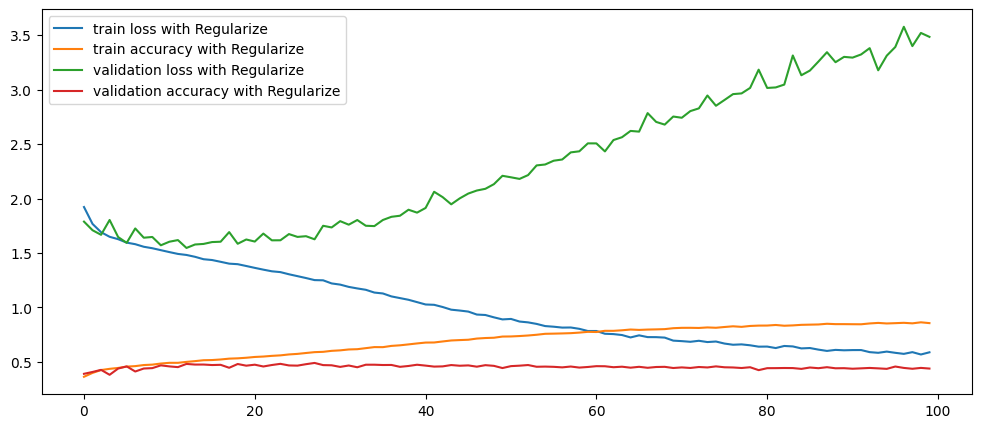

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(model_Regularize_Testing2_history.history['loss'], label='train loss with Regularize')
ax.plot(model_Regularize_Testing2_history.history['accuracy'], label='train accuracy with Regularize')
ax.plot(model_Regularize_Testing2_history.history['val_loss'], label='validation loss with Regularize')
ax.plot(model_Regularize_Testing2_history.history['val_accuracy'], label='validation accuracy with Regularize')
ax.legend()

In [ ]:
# evaluate the model
print(model_Regularize_Testing2.evaluate(x_test, y_test, verbose=0, return_dict=True))

{'loss': 3.3503222465515137, 'accuracy': 0.44911110401153564}
